# Association Rule
Nico Prasetyo - 0706022010027

## Pendahuluan

Association Rule adalah teknik data mining untuk menemukan aturan asosiatif antara suatu kombinasi item (W, 2021). Untuk menemukan aturan asosiatif tersebut, terdapat dua tahapan utama, yaitu mencari kombinasi yang sering terjadi dan untuk mendefinisikan kondisi (Arni, 2018). Association Rule biasanya digunakan dalam melakukan Market-Basket Analysis, menempatkan barang/produk pada rak yang tepat, merekomendasikan produk dalam sebuah website e-commerce, hingga memberikan rekomendasi lagu, dan lainnya (Garg, 2018). Pentingnya Association Rule dapat dipengaruhi oleh dua parameter, yaitu Support Value (persentase kombinasi item) dan Certainty Value (kuatnya relasi antar item) (Yudiananto, 2021). Sebagai contoh kasus, sebuah Marketing Manager dari sebuah supermarket ingin mengetahui produk mana yang sering dibeli secara bersamaan. Maka:

> **Buys (x,”beer”) -> buys(x, “chips”) [support = 1%, Certainty = 50%]**

X adalah Customer yang membeli beer dan chips bersamaan. Certainty menunjukkan bahwa jika customer membeli beer, maka terdapat 50% kemungkinan bahwa customer tersebut akan membeli chips juga. Support menunjukkan bahwa dari seluruh transaksi yang terjadi, terdapat 1% transaksi dimana beer dan chips dibeli secara bersamaan (Pedamkar, 2022). Selain Support dan Certainty atau Confidence, terdapat juga Lift, yaitu kemungkinan item Y dibeli jika item X dibeli (Ng, 2016). 
 Annalyn Ng (2016) juga menjelaskan beberapa ilustrasi perhitungan dalam Association Rule adalah sebagai berikut:

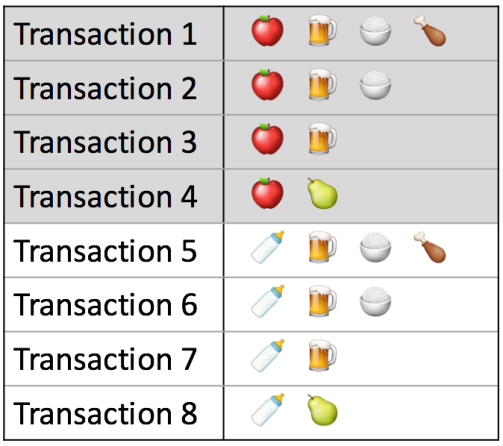

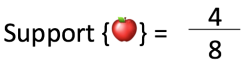

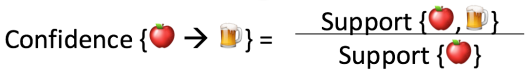

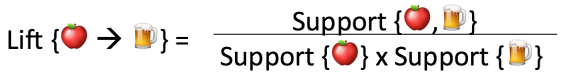

Penjelasan lebih lanjut mengenai Support, Certainty, dan Lift adalah sebagai berikut seperti dijelaskan oleh Malik (2022):
> **Support (B) = (Transactions containing (B)) / (Total Transactions)**

        Support (Apple) = 4/8 = 50%


> **Confidence (A→B) = (Transactions containing both (A and B)) / (Transactions containing A)**

        Confidence (Apple→Beer) = 3/4 = 75%

> **Lift (A→B) = (Confidence (A→B)) / (Support (B))**

        Lift (Apple→Beer) = (75/50) = 1.5
        
        



## Implementasi dan Penyelesaian Menggunakan Python

Tahapan pertama adalah melakukan import library dan dataset yang diperlukan ke dalam project. Menurut Gupta (2022) setelah melakukan import data ke dalam Data Frame, tahap berikutnya adalah untuk melakukan explorasi data. Torkan (2020) juga menjelaskan beberapa tahapan melakukan Association Rule menggunakan library mlxtend.frequent_patters adalah sebagai berikut:

In [1]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
#melakukan instalasi mlxtend dan melakukan import library
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
#memasukkan data dari excel ke dalam DataFrame
df = pd.read_csv("GroceryStoreDataSet.csv", names = ['products'], sep = ',')
df.head(5)

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [4]:
#mengubah Data Frame menjadi list dan mengubah value menjadi 0 dan True. Lalu mengembalikan data ke bentuk DataFrame. 
# False jika produk tidak dibeli dalam sebuah transaksi
# True jika produk dibeli dalam sebuah transaksi

data = list(df["products"].apply(lambda x:x.split(",") ))

from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df.head(5)

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [5]:
#Melakukan pembuatan model Apriori / Association Rule
df = apriori(df, min_support = 0.2, use_colnames = True)
df

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BREAD, BISCUIT)"


In [6]:
#menerapkan assosiation rule berdasarkan metric dan threshold
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


## Penjelasan dan Kesimpulan

Minimum Support atau min_support adalah nilai Support minimum yang dapat diperhitungkan ke dalam model. (Gupta K. , n.d.) Misalnya peneliti ingin memasukkan data item yang setidaknya muncul dalam 5 transaksi dari 20 transaksi, maka nilai minimum support adalah 0.25. Dalam model ini, digunakan min_threshold sebesar 0.6 yang berarti, jika item X dibeli, terdapat setidaknya 60% kemungkinan item Y juga dibeli. Beberapa contoh informasi yang diperoleh dari model diatas adalah:
- Probabilitas penjualan SUGER adalah 30%
- 67% pembeli SUGER akan membeli BREAD

### Referensi

Arni, U. D. (2018, 12 21). Pengertian dan penerapan Metode Association Rules. Retrieved from Garudacyber: https://garudacyber.co.id/artikel/1479-pengertian-dan-penerapan-metode-association-rules

Association rule using libraries mlxtend & apriori. (2020, March 22). Retrieved from OnlineFreeTutorial: https://onlinefreetutorial.com/association/

Garg, A. (2018, September 4). Complete guide to Association Rules (1/2). Retrieved from Towardsdatascience: https://towardsdatascience.com/association-rules-2-aa9a77241654

Gupta, A. (2022, August 23). Implementing Apriori algorithm in Python. Retrieved from Geeksforgeeks.org: https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/

Gupta, K. (n.d.). Association Rule Mining in Python. Retrieved from CodeSpeedy: https://www.codespeedy.com/association-rule-mining-in-python/

Malik, U. (2022, July 21). Association Rule Mining via Apriori Algorithm in Python. Retrieved from Stackabuse: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python

Ng, A. (2016, April 14). Association Rules and the Apriori Algorithm: A Tutorial. Retrieved from KDnuggets: https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

Pedamkar, P. (2022). Data Mining Methods. Retrieved from educba: https://www.educba.com/data-mining-methods

Torkan, M. (2020, October 18). Association Rules with Python. Retrieved from Medium: https://medium.com/@mervetorkan/association-rules-with-python-9158974e761a

W, S. A. (2021, July 16). Association Rules — Market Basket Analysis dengan Python. Retrieved from Medium: https://yandaafrida.medium.com/association-rule-market-basket-analysis-menggunakan-python-a9c49b4bfc69

Yudiananto, P. N. (2021, October 21). Data Mining Methods & Association Rule. Retrieved from sis.binus: https://sis.binus.ac.id/2021/10/27/data-mining-methods-association-rule/

https://www.kaggle.com/datasets/shazadudwadia/supermarket
